# imports

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import time 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Review DataSet - Binary Classification

In [47]:
DataFolder = './data/aclImdb/'
train_df = pd.read_csv( DataFolder +  'train_df.csv')
train_df.shape

(25000, 3)

In [48]:
test_df = pd.read_csv( DataFolder +  'test_df.csv')
test_df.shape

(25000, 3)

In [49]:
X_train = np.load(DataFolder + 'X_train.npy') 
y_train = np.load(DataFolder + 'y_train.npy')
X_train.shape , y_train.shape

((25000, 100), (25000,))

In [50]:
X_test = np.load(DataFolder + 'X_test.npy')
y_test = np.load(DataFolder + 'y_test.npy')
X_test.shape , y_test.shape

((25000, 100), (25000,))

In [51]:
def my_acc(y_test, y_pred):
    return np.mean(y_test == y_pred)


# KNN Using Brute Force

$$
\text{Time} = \textrm{O}(nd)
$$

In [87]:
def knn_implement1(k, X_new ,X_train, y_train):
    dist = []
    for i in range(X_train.shape[0]):
        dist.append(np.linalg.norm(X_new - X_train[i]))
    mask = np.argsort(dist)[:k]
    y_nearest = y_train[mask]
    return 1 if np.sum(y_nearest) > k/2 else 0

def knn_implement2(k, X_new ,X_train, y_train):
    import heapq
    dist = []
    for i in range(X_train.shape[0]):
        dist.append(np.linalg.norm(X_new - X_train[i]))
    k_nearest = heapq.nsmallest(k, range(len(dist)), dist.__getitem__)
    y_nearest = y_train[k_nearest]
    return np.argmax(np.bincount(y_nearest))

def knn_version_1(k , X_train, y_train, X_test , implementation = 1, verbose = False):
    y_pred = []
    for i in range(X_test.shape[0]):
        if i % 10 == 0 and verbose:
            print(f'progress {i/X_test.shape[0]*100:.2f}%')
        if implementation == 1:
            y_pred.append(knn_implement1(k, X_test[i], X_train, y_train))
        else:
            y_pred.append(knn_implement2(k, X_test[i], X_train, y_train))
    return np.array(y_pred)

sorting implementation

In [73]:
X_test_100 = X_test[:100]
y_test_100 = y_test[:100]

In [74]:
start_time = time.time()
y_kkn1 = knn_version_1(3, X_train, y_train, X_test_100, implementation = 1 , verbose = True)
print('Time taken :', time.time() - start_time) # for entire dataset : Approx 40 mins

progress 0.00%
progress 10.00%
progress 20.00%
progress 30.00%
progress 40.00%
progress 50.00%
progress 60.00%
progress 70.00%
progress 80.00%
progress 90.00%
Time taken : 9.804556131362915


In [75]:
my_acc(y_test_100, y_kkn1)

0.7

In [76]:
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_actual = knn.predict(X_test_100)
print('Time taken :', time.time() - start_time)

KNeighborsClassifier(n_neighbors=3)

Time taken : 0.027608156204223633


In [77]:
accuracy_score(y_test_100, y_actual)

0.7

In [80]:
print('difference ? : ' , 'NO' if np.all(y_actual == y_kkn1) else 'YES')

difference ? :  NO


minheap implementation

In [ ]:
start_time = time.time()
y_kkn1 = knn_version_1(3, X_train, y_train, X_test_100 , implementation = 2 , verbose = True)
print('Time taken :', time.time() - start_time) # pedda tedda em ledeee (No much difference)

progress 0.00%
progress 10.00%
progress 20.00%
progress 30.00%
progress 40.00%
progress 50.00%
progress 60.00%
progress 70.00%
progress 80.00%
progress 90.00%
Time taken : 9.587465286254883


In [84]:
my_acc(y_test_100, y_kkn1)

0.7

In [85]:
print('difference ? : ' , 'NO' if np.all(y_actual == y_kkn1) else 'YES')

difference ? :  NO


In [86]:
start_time = time.time()
y_kkn1 = knn_version_1(3, X_train, y_train, X_test[:1000] , implementation = 2)
print('Time taken :', time.time() - start_time)

progress 0.00%
progress 1.00%
progress 2.00%
progress 3.00%
progress 4.00%
progress 5.00%
progress 6.00%
progress 7.00%
progress 8.00%
progress 9.00%
progress 10.00%
progress 11.00%
progress 12.00%
progress 13.00%
progress 14.00%
progress 15.00%
progress 16.00%
progress 17.00%
progress 18.00%
progress 19.00%
progress 20.00%
progress 21.00%
progress 22.00%
progress 23.00%
progress 24.00%
progress 25.00%
progress 26.00%
progress 27.00%
progress 28.00%
progress 29.00%
progress 30.00%
progress 31.00%
progress 32.00%
progress 33.00%
progress 34.00%
progress 35.00%
progress 36.00%
progress 37.00%
progress 38.00%
progress 39.00%
progress 40.00%
progress 41.00%
progress 42.00%
progress 43.00%
progress 44.00%
progress 45.00%
progress 46.00%
progress 47.00%
progress 48.00%
progress 49.00%
progress 50.00%
progress 51.00%
progress 52.00%
progress 53.00%
progress 54.00%
progress 55.00%
progress 56.00%
progress 57.00%
progress 58.00%
progress 59.00%
progress 60.00%
progress 61.00%
progress 62.00%
pr

# KNN Using kd-tree

In [ ]:
def knn_version2(k , X_train, y_train, X_test):
    y_pred = []
    pass
    return np.array(y_pred)

In [ ]:
start_time = time.time()
y_knn2 = knn_version2(3, X_train, y_train, X_test[:1000])
print('Time taken :', time.time() - start_time)
print(f'Accuracy : {my_acc(y_test[:1000], y_knn2)}')

# KNN using LSH method

In [ ]:
def knn_version3(k , X_train, y_train, X_test):
    y_pred = []
    pass
    return np.array(y_pred)

In [ ]:
start_time = time.time()
y_knn2 = knn_version3(3, X_train, y_train, X_test[:1000])
print('Time taken :', time.time() - start_time)
print(f'Accuracy : {my_acc(y_test[:1000], y_knn2)}')

# KNN Using builtins
### sklearn.neighbors.KNeighborsClassifier

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
def knn_validation_data(k, X_train_split = X_train_split, y_train_split = y_train_split, X_val = X_val, y_val = y_val):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_split, y_train_split)
    y_pred = knn.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

def knn_test_data(k , X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    knn_all = KNeighborsClassifier(n_neighbors=k) 
    knn_all.fit(X_train, y_train)
    y_pred = knn_all.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [18]:

def knn_validation_data_sets(k, X_train = X_train, y_train = y_train):
    shuff = np.random.permutation(range(X_train.shape[0]))
    X_train = X_train[shuff]
    y_train = y_train[shuff]
    X_train_subsets = np.array_split(X_train, 10)
    y_train_subsets = np.array_split(y_train, 10)
    accuracies = []
    for idx in range(10):
        X_train_split = np.concatenate([X_train_subsets[i] for i in range(10) if i != idx])
        y_train_split = np.concatenate([y_train_subsets[i] for i in range(10) if i != idx])
        X_val = X_train_subsets[idx]
        y_val = y_train_subsets[idx]
        accuracy = knn_validation_data(k, X_train_split, y_train_split, X_val, y_val)
        accuracies.append(accuracy)
    return np.array(accuracies)

## KNN on Review Dataset

### K = 3

In [8]:
k = 3
print(f'Validation : {knn_validation_data(k)*100:.2f}%')
print(f'Test Data  : {knn_test_data(k)*100:.2f}%')


Validation : 70.74%
Test Data  : 81.09%


### K = 5

In [9]:
k = 5
print(f'Validation : {knn_validation_data(k)*100:.2f}%')
print(f'Test Data  : {knn_test_data(k)*100:.2f}%')


Validation : 72.18%
Test Data  : 77.64%


### K = 7

In [10]:
k = 7
print(f'Validation : {knn_validation_data(k)*100:.2f}%')
print(f'Test Data  : {knn_test_data(k)*100:.2f}%')


Validation : 72.78%
Test Data  : 75.52%


In [21]:
accs = knn_validation_data_sets(3)
accs.mean(), accs.std()

(0.70324, 0.009116929307612293)

### Checking for different K's - Random Validation

In [23]:
result_val = {}
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    fitt = knn.fit(X_train_split, y_train_split)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    # print(f'Accuracy for k={k}: {accuracy}')
    result_val[k] = accuracy

best_k = max(result_val, key=result_val.get)
print(f'Best k: {best_k} , accuracy: {result_val[best_k]}')

Best k: 47 , accuracy: 0.749


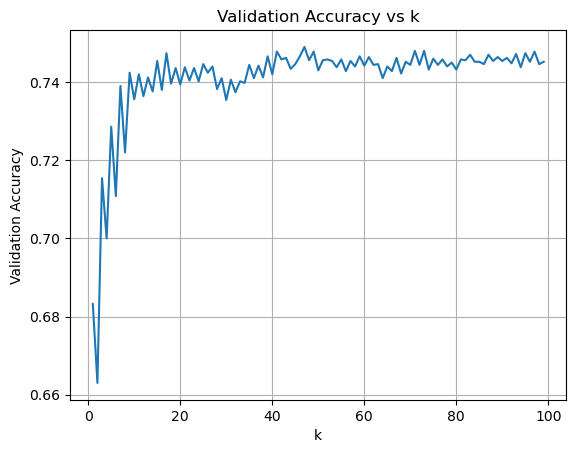

In [24]:
_ = plt.plot(list(result_val.keys()), list(result_val.values()))
_ = plt.xlabel('k')
_ = plt.ylabel('Validation Accuracy')
_ = plt.title('Validation Accuracy vs k')
_ = plt.grid(True)
_ = plt.show()

In [25]:
result = {}
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    fitt = knn.fit(X_train_split, y_train_split)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print(f'Accuracy for k={k}: {accuracy}')
    result[k] = accuracy

best_k = max(result, key=result.get)
print(f'Best k: {best_k} , accuracy: {result[best_k]}')

Best k: 1 , accuracy: 0.89796


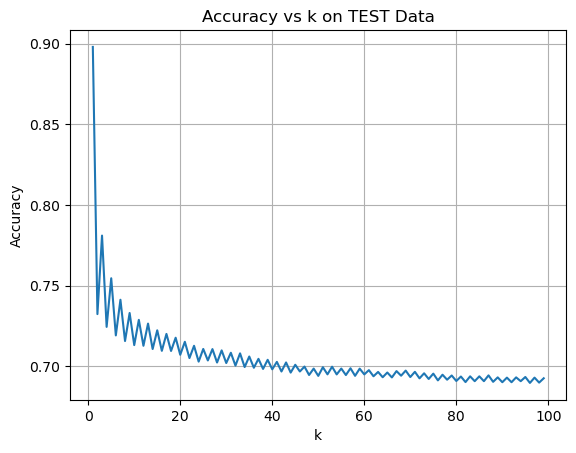

In [26]:
_ = plt.plot(list(result.keys()), list(result.values()))
_ = plt.xlabel('k')
_ = plt.ylabel('Accuracy')
_ = plt.title('Accuracy vs k on TEST Data')
_ = plt.grid(True)
_ = plt.show()

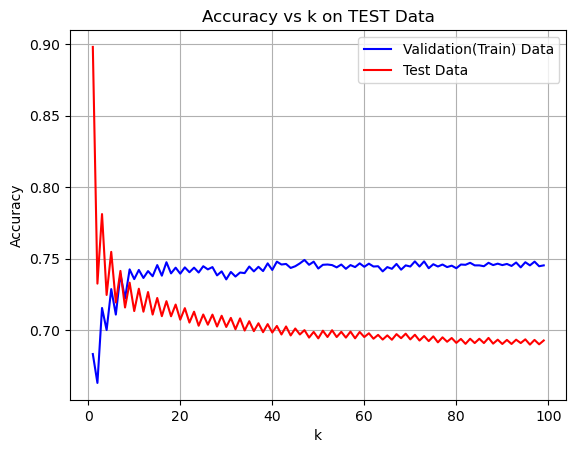

In [27]:
_ = plt.plot(list(result_val.keys()), list(result_val.values()) , label = 'Validation(Train) Data' , color='blue')
_ = plt.plot(list(result.keys()), list(result.values()) , label = 'Test Data' , color='red')
_ = plt.xlabel('k')
_ = plt.ylabel('Accuracy')
_ = plt.title('Accuracy vs k on TEST Data')
_ = plt.grid(True)
_ = plt.legend()
_ = plt.show()

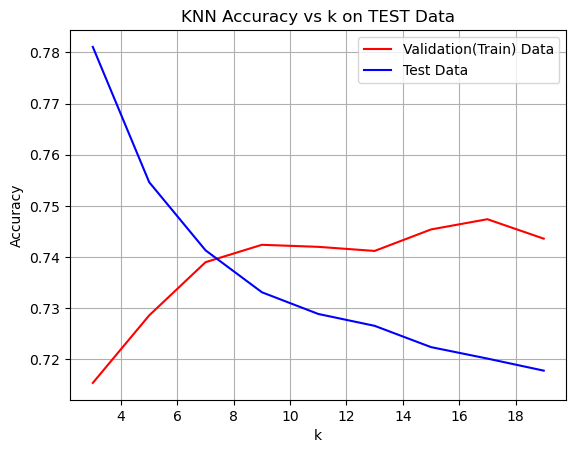

In [33]:
zoom_val = {k: v for k, v in result_val.items() if (k < 20 and k > 2) and k%2 != 0 }
zoom_test = {k: v for k, v in result.items() if (k < 20 and k > 2) and k%2 != 0 }
_ = plt.plot(list(zoom_val.keys()), list(zoom_val.values()) , label = 'Validation(Train) Data' , color='red')
_ = plt.plot(list(zoom_test.keys()), list(zoom_test.values()) , label = 'Test Data' , color='blue')
_ = plt.xlabel('k')
_ = plt.ylabel('Accuracy')
_ = plt.title('KNN Accuracy vs k on TEST Data')
_ = plt.grid(True)
_ = plt.legend()
_ = plt.show()

### Checking for different K's - Subset Validation

Best k: 33 , accuracy: 0.73988


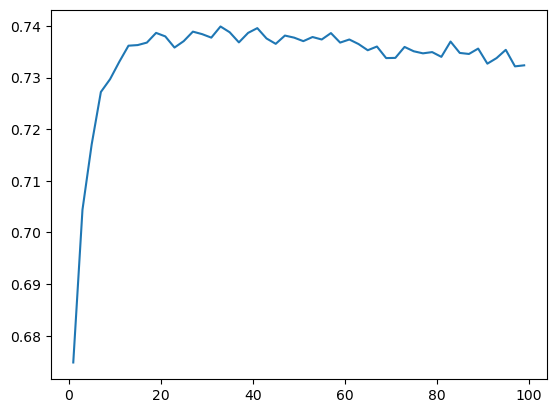

In [22]:
result_val = {}
for k in range(1,100,2):
    acc = knn_validation_data_sets(k)
    result_val[k] = acc.mean()

best_k = max(result_val, key=result_val.get)
print(f'Best k: {best_k} , accuracy: {result_val[best_k]}')
plt.plot(list(result_val.keys()), list(result_val.values()))

##  Dataset Titanic - Binary  Classification

In [90]:
tDataFolder = './data/titanic/'
tX_train = np.load(tDataFolder + 'X_train.npy')
ty_train = np.load(tDataFolder + 'y_train.npy')
tX_test = np.load(tDataFolder + 'X_test.npy')
ty_test = np.load(tDataFolder + 'y_test.npy')
tX_train.shape , ty_train.shape , tX_test.shape , ty_test.shape

((1047, 10), (1047,), (262, 10), (262,))

## KNN on Titanic Dataset

In [91]:
tX_train_split, tX_val, ty_train_split, ty_val = train_test_split(tX_train, ty_train, test_size=0.2)
tX_train_split.shape , tX_val.shape , ty_train_split.shape , ty_val.shape

((837, 10), (210, 10), (837,), (210,))

#### My implementations

In [92]:
start_time = time.time()
ty_knn1 = knn_version_1(3, tX_train , ty_train, tX_test)
print(f'Time taken : {time.time() - start_time}')
my_acc(ty_test, ty_knn1)

Time taken : 0.9975767135620117


0.7748091603053435

In [95]:
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(tX_train, ty_train)
ty_pred = knn.predict(tX_test)
print('Time taken :', time.time() - start_time)
accuracy_score(ty_test, ty_pred)

KNeighborsClassifier(n_neighbors=3)

Time taken : 0.041613101959228516


0.7709923664122137

In [96]:
np.sum(ty_knn1 - ty_pred)

-1

In [102]:
start_time = time.time()
ty_knn12 = knn_version_1(3, tX_train , ty_train, tX_test , implementation=2 )
print(f'Time taken : {time.time() - start_time}')
my_acc(ty_test, ty_knn12)

Time taken : 1.0459470748901367


0.7748091603053435

In [103]:
np.sum(ty_knn12 - ty_pred)

-1

### K = 3

In [93]:
k = 3
print(f'Validation : {knn_validation_data(k, tX_train_split ,ty_train_split , tX_val, ty_val )*100:.2f}%')
print(f'Test Data  : {knn_test_data(k , tX_train , ty_train, tX_test , ty_test )*100:.2f}%')

Validation : 76.67%
Test Data  : 77.10%
Time taken : 0.024023056030273438


### K = 5

In [59]:
k = 5
print(f'Validation : {knn_validation_data(k, tX_train_split ,ty_train_split , tX_val, ty_val )*100:.2f}%')
print(f'Test Data  : {knn_test_data(k , tX_train , ty_train, tX_test , ty_test )*100:.2f}%')

Validation : 80.95%
Test Data  : 79.39%


### K = 7

In [60]:
k = 7
print(f'Validation : {knn_validation_data(k, tX_train_split ,ty_train_split , tX_val, ty_val )*100:.2f}%')
print(f'Test Data  : {knn_test_data(k , tX_train , ty_train, tX_test , ty_test )*100:.2f}%')

Validation : 83.33%
Test Data  : 78.24%


### Checking for different K's

In [61]:
result_val = {}
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    fitt = knn.fit(tX_train_split, ty_train_split)
    ty_pred = knn.predict(tX_val)
    accuracy = accuracy_score(ty_val, ty_pred)
    # print(f'Accuracy for k={k}: {accuracy}')
    result_val[k] = accuracy

best_k = max(result_val, key=result_val.get)
print(f'Best k: {best_k} , accuracy: {result_val[best_k]}')

Best k: 11 , accuracy: 0.8523809523809524


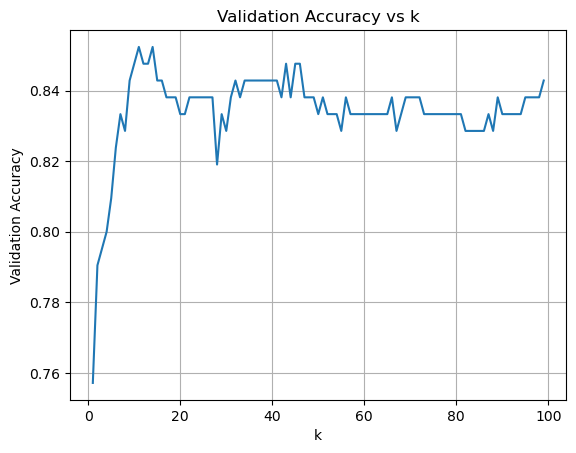

In [62]:
_ = plt.plot(list(result_val.keys()), list(result_val.values()))
_ = plt.xlabel('k')
_ = plt.ylabel('Validation Accuracy')
_ = plt.title('Validation Accuracy vs k')
_ = plt.grid(True)
_ = plt.show()

In [63]:
result = {}
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    fitt = knn.fit(tX_train_split, ty_train_split)
    ty_pred = knn.predict(tX_test)
    accuracy = accuracy_score(ty_test, ty_pred)
    # print(f'Accuracy for k={k}: {accuracy}')
    result[k] = accuracy

best_k = max(result, key=result.get)
print(f'Best k: {best_k} , accuracy: {result[best_k]}')

Best k: 23 , accuracy: 0.8320610687022901


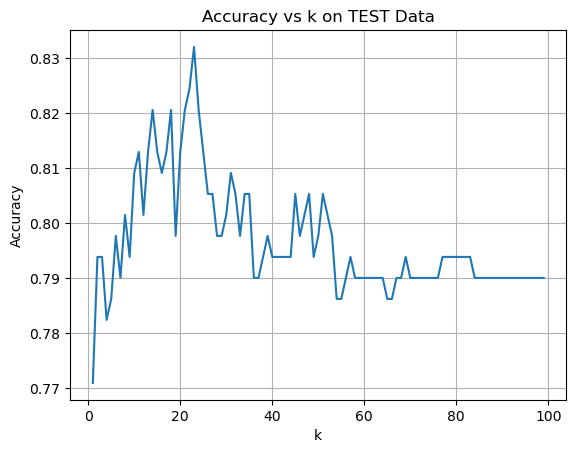

In [64]:
_ = plt.plot(list(result.keys()), list(result.values()))
_ = plt.xlabel('k')
_ = plt.ylabel('Accuracy')
_ = plt.title('Accuracy vs k on TEST Data')
_ = plt.grid(True)
_ = plt.show()

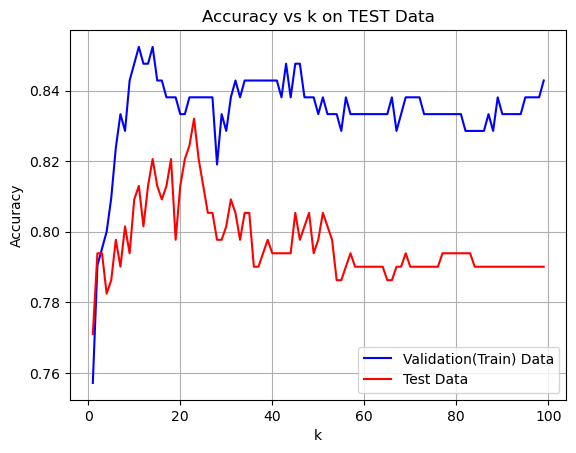

In [65]:
_ = plt.plot(list(result_val.keys()), list(result_val.values()) , label = 'Validation(Train) Data' , color='blue')
_ = plt.plot(list(result.keys()), list(result.values()) , label = 'Test Data' , color='red')
_ = plt.xlabel('k')
_ = plt.ylabel('Accuracy')
_ = plt.title('Accuracy vs k on TEST Data')
_ = plt.grid(True)
_ = plt.legend()
_ = plt.show()

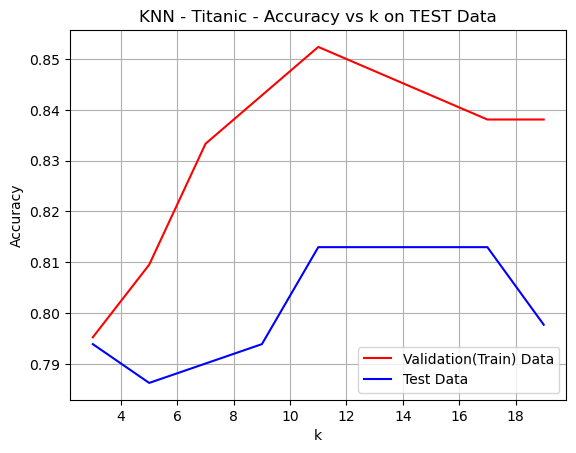

In [67]:
zoom_val = {k: v for k, v in result_val.items() if (k < 20 and k > 2) and k%2 != 0 }
zoom_test = {k: v for k, v in result.items() if (k < 20 and k > 2) and k%2 != 0 }
_ = plt.plot(list(zoom_val.keys()), list(zoom_val.values()) , label = 'Validation(Train) Data' , color='red')
_ = plt.plot(list(zoom_test.keys()), list(zoom_test.values()) , label = 'Test Data' , color='blue')
_ = plt.xlabel('k')
_ = plt.ylabel('Accuracy')
_ = plt.title('KNN - Titanic - Accuracy vs k on TEST Data')
_ = plt.grid(True)
_ = plt.legend()
_ = plt.show()

### Checking for different K's - Subset Validation

Best k: 15 , accuracy: 0.8051739926739927


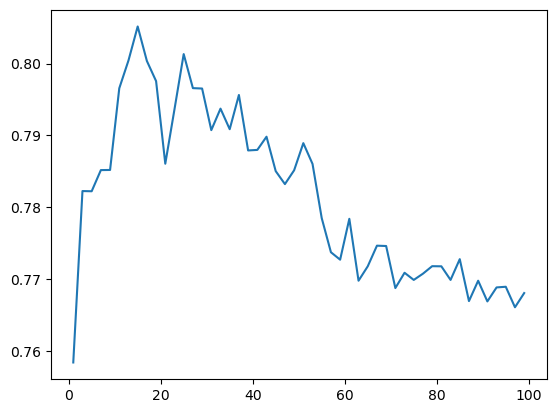

In [27]:
result_val = {}
for k in range(1,100,2):
    acc = knn_validation_data_sets(k , tX_train , ty_train)
    result_val[k] = acc.mean()

best_k = max(result_val, key=result_val.get)
print(f'Best k: {best_k} , accuracy: {result_val[best_k]}')
plt.plot(list(result_val.keys()), list(result_val.values()))